In [0]:
from keras.datasets import imdb

In [0]:
vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

17465344/17464789 [==============================] - 0s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


In [0]:
print('---review---')
print(X_train[722])
print('---label---')
print(y_train[722])

---review---
[1, 900, 12, 9, 31, 7, 4, 249, 102, 207, 126, 110, 5, 13, 384, 126, 61, 322, 5, 13, 71, 199, 1100, 46, 7, 263, 2638, 746, 158, 234, 24, 8, 760, 112, 357, 12, 9, 1097, 1297, 372, 701, 2493, 92, 2, 295, 885, 81, 36, 2507, 2828, 1094, 5, 2481, 92, 412, 295, 73, 83, 68, 2, 5, 521, 187, 2, 1105, 295, 5, 1728, 11, 2, 11, 1375, 1547, 349, 92, 169, 46, 68, 322, 5, 799, 2, 2, 4, 314, 159, 4, 1761, 5, 95, 115, 4114, 12, 19, 301, 322, 427, 647, 10, 10, 2, 2, 9, 869, 4, 249, 524, 11, 108, 639, 59, 2, 54, 59, 144, 30, 2578, 5, 4583, 2, 4, 64, 20, 59, 47, 126, 77, 52, 11, 9, 2, 3527, 5, 15, 9, 88, 59, 286, 116, 10, 10, 13, 566, 4380, 195, 89, 78, 14, 20, 16]
---label---
0


In [0]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

In [0]:
from keras.preprocessing import sequence
max_words = 1000
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [0]:
from tensorboardcolab import *
tbc = TensorBoardColab()
#just add callbacks=[TensorBoardColabCallback(tbc)] in model.fit

Wait for 8 seconds...
TensorBoard link:
http://ef9a68a9.ngrok.io


###Single LSTM

In [0]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [0]:
batch_size = 64
num_epochs = 5
#X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
#X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=num_epochs)
model.save('model_simple_LSTM.h5')

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 974s 39ms/step - loss: 0.4200 - acc: 0.8130 - val_loss: 0.3426 - val_acc: 0.8623
Epoch 2/5
25000/25000 [==============================] - 971s 39ms/step - loss: 0.2902 - acc: 0.8836 - val_loss: 0.3252 - val_acc: 0.8761
Epoch 3/5
25000/25000 [==============================] - 967s 39ms/step - loss: 0.2379 - acc: 0.9093 - val_loss: 0.3090 - val_acc: 0.8698
Epoch 4/5
25000/25000 [==============================] - 972s 39ms/step - loss: 0.2084 - acc: 0.9198 - val_loss: 0.3197 - val_acc: 0.8743
Epoch 5/5
25000/25000 [==============================] - 963s 39ms/step - loss: 0.2386 - acc: 0.9011 - val_loss: 0.3527 - val_acc: 0.8634


###Simple RNN

In [0]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
embedding_size=32
model_1rnn=Sequential()
model_1rnn.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model_1rnn.add(SimpleRNN(100))
model_1rnn.add(Dense(1, activation='sigmoid'))
print(model_1rnn.summary())
model_1rnn.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

model_1rnn.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=num_epochs)
model_1rnn.save('model_1RNN.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 173,401
Trainable params: 173,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 194s 8ms/step - loss: 0.6674 - acc: 0.5729 - val_loss: 0.6163 - val_acc: 0.6518
Epoch 2/5
25000/25000 [==============================] - 191s 8ms/step - loss: 0.5780 - acc: 0.6908 - val_loss: 0.6554 - val_acc: 0.6007
Epoch 3/5
25000/25000 [==============================] - 190s 8ms/step 

###Two layer SRNN

In [0]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
model_2rnn=Sequential()
model_2rnn.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model_2rnn.add(SimpleRNN(100,return_sequences = True))
model_2rnn.add(SimpleRNN(100))

model_2rnn.add(Dense(1, activation='sigmoid'))
print(model_2rnn.summary())
model_2rnn.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

model_2rnn.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=num_epochs)
model_2rnn.save('model_2RNN.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 500, 100)          13300     
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 193,501
Trainable params: 193,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 404s 16ms/step - loss: 0.6977 - acc: 0.5147 - val_loss: 0.6851 - val_acc: 0.5335
Epoch 2/5
25000/25000 [==============================] - 401s 16ms/step - l

###Two layered LSTM

In [0]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

batch_size = 64
num_epochs = 5
#X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
#X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=num_epochs)
model.save('model_2LSTM.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 500, 100)          53200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 293,701
Trainable params: 293,701
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 958s 38ms/step - loss: 0.4853 - acc: 0.7647 - val_loss: 0.3494 - val_acc: 0.8484
Epoch 2/5
25000/25000 [==============================] - 958s 38ms/step - l

##Transfer Learning
Learning with top models so far

In [0]:
data_for_test['sentiment'].value_counts()

positive    657
negative    157
Name: sentiment, dtype: int64

In [0]:
## Single LSTM
from keras.models import load_model
model = load_model('model_simple_LSTM.h5')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________


In [0]:
import pandas as pd
df = pd.read_csv('mod.csv')
df.text=df.text.astype(str)
df = df.drop(columns='Unnamed: 0')
df = df[df['sentiment'] != 'neutral']

df.head()

,sentiment,text
0,positive,"Thank you, Ellen. We have a strong 2018, with ..."
1,positive,Stock-based compensation totaled $2.3 billion....
3,positive,[Operator Instructions]. Our first question wi...
4,positive,"Hey, thanks. So I guess the question I have an..."
5,positive,I'll take that one Karen. Well obviously a lot...


In [0]:
df['sentiment'] = df['sentiment'].replace({'positive': 0,'negative':1})
df.head()


,sentiment,text
0,0,"Thank you, Ellen. We have a strong 2018, with ..."
1,0,Stock-based compensation totaled $2.3 billion....
3,0,[Operator Instructions]. Our first question wi...
4,0,"Hey, thanks. So I guess the question I have an..."
5,0,I'll take that one Karen. Well obviously a lot...


In [0]:
X = df['text'].values
y = df['sentiment'].values

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
#tk = Tokenizer(lower = True)
#tk.fit_on_texts(X)
#X_seq = tk.texts_to_sequences(X)
#X_pad = pad_sequences(X_seq, maxlen=1000, padding='post')
tokenizer = Tokenizer(num_words=1000)
edgar_x_test_bow = tokenizer.texts_to_matrix(df['text'].tolist(), mode='freq')
edgar_test_labels = np.asarray(df['sentiment'])

In [0]:
score = model.evaluate(edgar_x_test_bow, edgar_test_labels, verbose=1)
print('Test Loss:', score[0], 'Test Accuracy:', score[1])

814/814 [==============================] - 18s 23ms/step
Test Loss: 0.5266519169842582 Test Accuracy: 0.8071253068324096


In [0]:
preds = model.predict(edgar_x_test_bow,verbose=1)

814/814 [==============================] - 18s 23ms/step


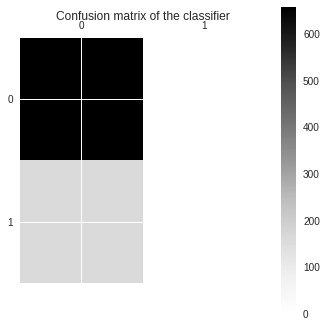

In [0]:
import matplotlib.pyplot as pl
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds.round())
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [0]:
print(cm)

[[657   0]
 [157   0]]


In [0]:
model = load_model('model_2LSTM.h5')
score = model.evaluate(edgar_x_test_bow, edgar_test_labels, verbose=1)
print('Test Loss:', score[0], 'Test Accuracy:', score[1])
preds = model.predict(edgar_x_test_bow,verbose=1)
import matplotlib.pyplot as pl
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds.round())
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()